In [89]:
# Import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Load the dataset
df = pd.read_csv("/home/user/Desktop/E-commerce Data Analysis/amazon.csv")

# Display the first few rows
df.head()


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [91]:
# Check for missing values
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [92]:
# Remove duplicate 'product_id' to avoid MySQL primary key errors.
df = df.drop_duplicates(subset=['product_id'])

In [93]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirming if the missing values are removed
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [94]:
# Remove non-numeric characters and convert to float
df["discounted_price"] = df["discounted_price"].replace('[^\d.]', '', regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace('[^\d.]', '', regex=True).astype(float)

# Verify changes
df[["discounted_price", "actual_price"]].head()

discounted_price  actual_price
0             399.0        1099.0
1             199.0         349.0
2             199.0        1899.0
3             329.0         699.0
4             154.0         399.0

In [95]:
# Converting the rating_count column to integer format
df["rating_count"] = df["rating_count"].replace(',', '', regex=True).astype(int)

# Verify changes
df["rating_count"].head()

0    24269
1    43994
2     7928
3    94363
4    16905
Name: rating_count, dtype: int64

In [97]:
# Extract the first category (assuming categories are separated by "|")
df["main_category"] = df["category"].str.split('|').str[0]

# Verify changes
df[["category", "main_category"]].head()

category          main_category
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories

In [98]:
# Calculate discount amount
df["discount_amount"] = df["actual_price"] - df["discounted_price"]

# Verify changes
df[["actual_price", "discounted_price", "discount_amount"]].head()

actual_price  discounted_price  discount_amount
0        1099.0             399.0            700.0
1         349.0             199.0            150.0
2        1899.0             199.0           1700.0
3         699.0             329.0            370.0
4         399.0             154.0            245.0

In [99]:
# Convert discount_percentage to numeric format
df["discount_percentage"] = df["discount_percentage"].str.replace('%', '').astype(float)

# Verify changes
df["discount_percentage"].head()

0    64.0
1    43.0
2    90.0
3    53.0
4    61.0
Name: discount_percentage, dtype: float64

In [100]:
# Extracting review year if review_date exists
if 'review_date' in df.columns:
    df['review_year'] = pd.to_datetime(df['review_date'], errors='coerce').dt.year
    
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage rating  rating_count  \
0        1099.0                 64.0    4.2         24269   
1         349.0         

In [101]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",    
    user="joy",
    password="NewChange@2025",
    connection_timeout=600  # 5 minutes timeout 
)

cursor = conn.cursor()
print("Connected to MySQL successfully!")

Connected to MySQL successfully!


In [102]:
cursor.execute("USE ecommerce_db;")  # Select the database before inserting data

In [103]:
# Run DESCRIBE command
cursor.execute("DESCRIBE products;")


# Fetch and print results
for row in cursor.fetchall():
    print(row)

# Close connection
cursor.close()
conn.close()


('product_id', 'varchar(50)', 'NO', 'PRI', None, '')
('product_name', 'text', 'NO', '', None, '')
('category', 'varchar(255)', 'YES', '', None, '')
('discounted_price', 'decimal(10,2)', 'YES', '', None, '')
('actual_price', 'decimal(10,2)', 'YES', '', None, '')
('discount_percentage', 'float', 'YES', '', None, '')
('rating', 'float', 'YES', '', None, '')
('rating_count', 'int', 'YES', '', None, '')
('about_product', 'text', 'YES', '', None, '')
('user_id', 'varchar(50)', 'YES', '', None, '')
('user_name', 'text', 'YES', '', None, '')
('review_id', 'varchar(50)', 'YES', '', None, '')
('review_title', 'text', 'YES', '', None, '')
('review_content', 'text', 'YES', '', None, '')
('img_link', 'text', 'YES', '', None, '')
('product_link', 'text', 'YES', '', None, '')
('main_category', 'varchar(255)', 'YES', '', None, '')
('discount_amount', 'decimal(10,2)', 'YES', '', None, '')


In [104]:
# Print length of user_id values to check for issues
for i, row in df.iterrows():
    if len(str(row['user_id'])) > 50:
        print(f"Row {i}: user_id too long -> {row['user_id']}")

Row 0: user_id too long -> AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ
Row 1: user_id too long -> AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ
Row 2: user_id too long -> AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q
Row 3: user_id too long -> AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGIL

In [105]:
df['user_id'] = df['user_id'].astype(str).str[:50]  # Truncate to 50 characters

In [107]:
df['review_id'] = df['review_id'].astype(str).str[:50]

In [109]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Converts invalid values to NaN
df = df.dropna(subset=['rating'])  # Drop rows with invalid ratings

In [119]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",    
    user="joy",
    password="NewChange@2025",
    connection_timeout=600, # 5 minutes timeout 
    autocommit=True
)

cursor = conn.cursor()

In [120]:
cursor.execute("USE ecommerce_db")

In [121]:
sql = """ INSERT INTO products (
    product_id, product_name, category, discounted_price, actual_price, 
    discount_percentage, rating, rating_count, about_product, user_id, 
    user_name, review_id, review_title, review_content, img_link, 
    product_link, main_category, discount_amount
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Convert DataFrame to list of tuples
values = [tuple(row) for row in df.itertuples(index=False, name=None)]

# Insert multiple rows at once
cursor.executemany(sql, values)

# Commit and close
conn.commit()
conn.close()

In [ ]:
df['review_id'] = df['review_id'].astype(str).str[:50]

In [114]:
cursor.execute("SHOW FULL PROCESSLIST;")
for row in cursor.fetchall():
    print(row)


(5, 'event_scheduler', 'localhost', None, 'Daemon', 1524, 'Waiting on empty queue', None)
(12, 'joy', 'localhost:60910', 'my_database', 'Sleep', 52, '', None)
(13, 'joy', 'localhost:60924', 'my_database', 'Sleep', 52, '', None)
(16, 'joy', 'localhost:52652', 'ecommerce_db', 'Sleep', 668, '', None)
(17, 'joy', 'localhost:41872', 'ecommerce_db', 'Sleep', 636, '', None)
(18, 'joy', 'localhost:34310', 'ecommerce_db', 'Sleep', 518, '', None)
(19, 'joy', 'localhost:56592', 'ecommerce_db', 'Query', 0, 'init', 'SHOW FULL PROCESSLIST')


In [115]:
cursor.execute("KILL 16;")  # Replace 16 with the actual process ID
cursor.execute("KILL 17;")
cursor.execute("KILL 18;")
conn.commit()

In [126]:
cursor.execute("SHOW FULL PROCESSLIST;")
print(cursor.fetchall())

[(5, 'event_scheduler', 'localhost', None, 'Daemon', 16592, 'Waiting on empty queue', None), (12, 'joy', 'localhost:60910', 'my_database', 'Sleep', 380, '', None), (13, 'joy', 'localhost:60924', 'my_database', 'Sleep', 380, '', None), (19, 'joy', 'localhost:56592', 'ecommerce_db', 'Sleep', 14990, '', None), (22, 'joy', 'localhost:42588', None, 'Query', 0, 'init', 'SHOW FULL PROCESSLIST')]


In [133]:
conn.reconnect(attempts=3, delay=2)  # Retry 3 times with 2s delay if lost

In [134]:
print("Connected:", conn.is_connected())  # Should print True

Connected: True


In [135]:
cursor.execute("USE ecommerce_db")

In [136]:
# Query top 10 most reviewed products
query = "SELECT product_name, rating_count FROM products ORDER BY rating_count DESC LIMIT 10;"
df_top_reviewed = pd.read_sql(query, conn)

# Close connection after use
conn.close()

df_top_reviewed

/tmp/ipykernel_8879/4076453932.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_reviewed = pd.read_sql(query, conn)


product_name  rating_count
0  AmazonBasics Flexible Premium HDMI Cable (Blac...        426973
1  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        426973
2  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...        426973
3  boAt Bassheads 100 in Ear Wired Earphones with...        363713
4  boAt Bassheads 100 in Ear Wired Earphones with...        363713
5  boAt BassHeads 100 in-Ear Wired Headphones wit...        363711
6  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...        313836
7  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...        313836
8  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...        313832
9  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...        313832

In [138]:
conn.reconnect(attempts=3, delay=2)  # Retry 3 times with 2s delay if lost

In [140]:
cursor.execute("USE ecommerce_db")

In [141]:
# Query category with highest average rating
query = "SELECT category, AVG(rating) AS avg_rating FROM products GROUP BY category ORDER BY avg_rating DESC LIMIT 1;"
df_best_category = pd.read_sql(query, conn)
df_best_category

/tmp/ipykernel_8879/2204531951.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_best_category = pd.read_sql(query, conn)


category  avg_rating
0  Computers&Accessories|Tablets         4.6

In [142]:
conn.reconnect(attempts=3, delay=2)  # Retry 3 times with 2s delay if lost

cursor.execute("USE ecommerce_db")

In [143]:
# Query products with discount > 50%
query = "SELECT product_name, discount_percentage FROM products WHERE discount_percentage > 50;"
df_big_discounts = pd.read_sql(query, conn)
df_big_discounts

/tmp/ipykernel_8879/673009720.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_big_discounts = pd.read_sql(query, conn)


product_name  discount_percentage
0    D-Link DWA-131 300 Mbps Wireless Nano USB Adap...                 58.0
1            SanDisk Cruzer Blade 32GB USB Flash Drive                 56.0
2    BlueRigger Digital Optical Audio Toslink Cable...                 76.0
3    TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...                 54.0
4    HP X1000 Wired USB Mouse with 3 Handy Buttons,...                 59.0
..                                                 ...                  ...
601  Fire-Boltt Gladiator 1.96" Biggest Display Sma...                 60.0
602  Syncwire LTG to USB Cable for Fast Charging Co...                 80.0
603  Campfire Spring Chef Prolix Instant Portable W...                 57.0
604  Room Heater Warmer Wall-Outlet 400 Watts Elect...                 60.0
605  WIDEWINGS Electric Handheld Milk Wand Mixer Fr...                 74.0

[606 rows x 2 columns]

In [144]:
conn.reconnect(attempts=3, delay=2)  # Retry 3 times with 2s delay if lost

cursor.execute("USE ecommerce_db")

In [145]:
# Query user with most reviews
query = "SELECT user_name, COUNT(*) AS review_count FROM products GROUP BY user_name ORDER BY review_count DESC LIMIT 1;"
df_top_reviewer = pd.read_sql(query, conn)
df_top_reviewer

/tmp/ipykernel_8879/339554699.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_reviewer = pd.read_sql(query, conn)


user_name  review_count
0  $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...             8

In [146]:
conn.reconnect(attempts=3, delay=2)  # Retry 3 times with 2s delay if lost

cursor.execute("USE ecommerce_db")

In [147]:
# Query top 5 best-selling categories
query = "SELECT category, SUM(rating_count) AS total_reviews FROM products GROUP BY category ORDER BY total_reviews DESC LIMIT 5;"
df_top_categories = pd.read_sql(query, conn)
df_top_categories

/tmp/ipykernel_8879/3848318950.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_categories = pd.read_sql(query, conn)


category  total_reviews
0  Electronics|Headphones,Earbuds&Accessories|Hea...      4012352.0
1  Electronics|Mobiles&Accessories|Smartphones&Ba...      2493269.0
2  Computers&Accessories|Accessories&Peripherals|...      2221671.0
3  Electronics|HomeTheater,TV&Video|Accessories|C...      1455967.0
4        Electronics|WearableTechnology|SmartWatches      1227958.0

In [148]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",    
    user="joy",
    password="NewChange@2025",
    connection_timeout=600, # 5 minutes timeout 
    autocommit=True
)

cursor = conn.cursor()

In [149]:

cursor.execute("USE ecommerce_db")

In [150]:
# Load data into Pandas
query = "SELECT * FROM products;"
df = pd.read_sql(query, conn)
conn.close()

# Display first 5 rows
df.head()

/tmp/ipykernel_8879/2160014230.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
2  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
3  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   
4  B004IO5BMQ  Logitech M235 Wireless Mouse, 1000 DPI Optical...   

                                            category  discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             507.0   
1  Computers&Accessories|NetworkingDevices|Networ...             749.0   
2  Electronics|GeneralPurposeBatteries&BatteryCha...             399.0   
3  Computers&Accessories|Accessories&Peripherals|...             279.0   
4  Computers&Accessories|Accessories&Peripherals|...             699.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1208.0                 58.0     4.1          8131   
1        1339.0                 44.0     4.2        179692   
2         499.0                 20.0     4.3         27201   
3         375.0                 26.0     4.3         31534   
4         995.0                 30.0     4.5         54405   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
2  Duracell Rechargeable AAA 750mAh batteries sta...   
3  A comfortable, ambidextrous shape feels good i...   
4  You can surf the Web with more comfort and eas...   

                                             user_id  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
1  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
2  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...   
3  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   
4  AGIOL4B6EPMZ63RZQFWZWI33O2EA,AG33OJYQIXPPS7CON...   

                                           user_name  \
0  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
1  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   
2  T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...   
3  Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...   
4  Chandrashekar SK,Mohammed Ashfaque,Arif Hussai...   

                                           review_id  \
0  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
1  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   
2  R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...   
3  R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...   
4  R28ZB0YUM6FKKB,RNB44LXBJIPTL,RVSWATRY0CJIV,R3I...   

                                        review_title  \
0  good tool to use for,Brand is always good,Over...   
1  Works on linux for me. Get the model with ante...   
2  Works Good,Perfect replacement cell for trimme...   
3  Handy Mouse,Good quality mouse,Good one.,Good,...   
4  Good silent mouse,Too small to hold!,Reviewing...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  I use this to connect an old PC to internet. I...   
2  Works good,Bought it to replace my Phillips QT...   
3  Liked this Product,https://m.media-amazon.com/...   
4  It's little small for big hands. But best avai...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
2  https://m.media-amazon.com/images/I/418YrbHVLC...   
3  https://m.media-amazon.com/images/I/31iFF1Kbkp...   
4  https://m.media-amazon.com/images/I/31CtVvtFt+...   

                                        product_link          main_category  \
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...  Computers&Accessories   
1  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...  Computers&Accessories   
2  https://www.amazon.in/Duracell-AAA-750mAh-Rech...            Electronics   
3  https://www.amazon.in/Logitech-B100-Optical-Mo...  Computers&Accessories   
4  https://www.amazon.

In [151]:
# Check data types
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1348 non-null   object 
 1   product_name         1348 non-null   object 
 2   category             1348 non-null   object 
 3   discounted_price     1348 non-null   float64
 4   actual_price         1348 non-null   float64
 5   discount_percentage  1348 non-null   float64
 6   rating               1348 non-null   float64
 7   rating_count         1348 non-null   int64  
 8   about_product        1348 non-null   object 
 9   user_id              1348 non-null   object 
 10  user_name            1348 non-null   object 
 11  review_id            1348 non-null   object 
 12  review_title         1348 non-null   object 
 13  review_content       1348 non-null   object 
 14  img_link             1348 non-null   object 
 15  product_link         1348 non-null   o

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
main_category          0
discount_amount        0
dtype: int64

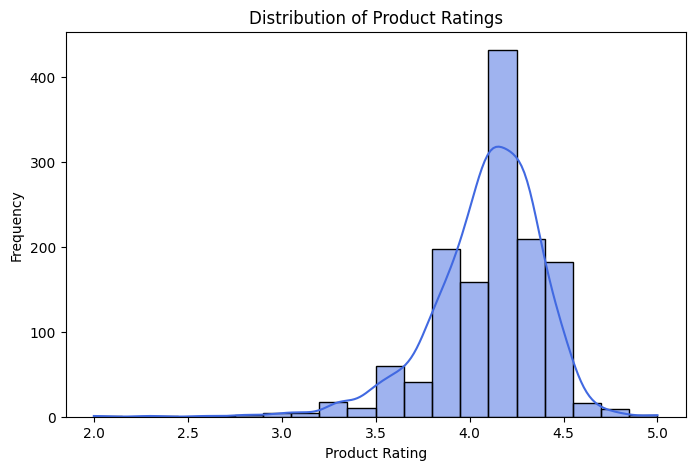

In [152]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=20, kde=True, color="royalblue")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Product Ratings")
plt.show()

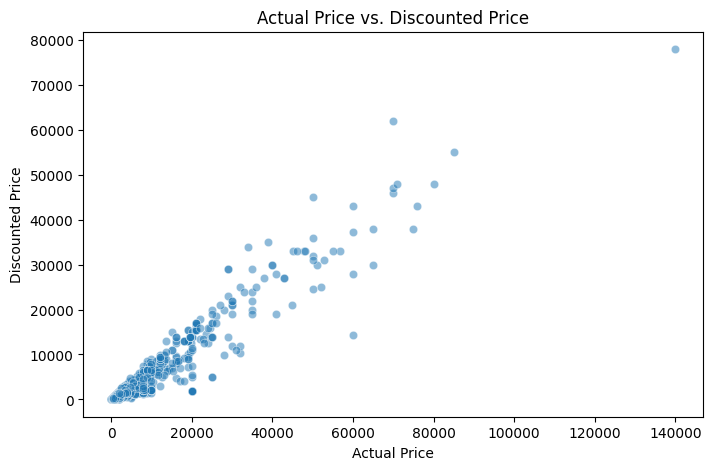

In [153]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["actual_price"], y=df["discounted_price"], alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Actual Price vs. Discounted Price")
plt.show()

In [ ]:
top_reviewers = df["user_name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("User Name")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Reviewers")
plt.show()